In [4]:
import torch
import numpy as np
from ANN_model import Taichung_features12_NN
from Dataset import Features12_dataset
from Utils import loss_plot
from torch.utils.data import DataLoader
from Train import train_model

In [5]:
BATCH_SIZE = 32
RANDOM_STATE = 42

X = np.load('Grouped_by_city/taichung_features12_train.npy')
y = np.load('Grouped_by_city/taichung_target_train.npy')

train_dataset = Features12_dataset(X, y, train=True, random_state=RANDOM_STATE)
test_dataset = Features12_dataset(X, y, train=False, random_state=RANDOM_STATE)
print('Total num of data:', train_dataset.__len__()+test_dataset.__len__())
y_scaler_train = train_dataset.get_y_scaler()
y_scaler_test = test_dataset.get_y_scaler()

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_dataset.__len__(), shuffle=False)

Total num of data: 996


In [6]:
model = Taichung_features12_NN()
model_trained, trainloss, testloss = train_model(model, train_loader, test_loader, y_scaler_train, y_scaler_test, num_epochs=500, lr=0.01, weight_decay=1e-4, factor=0.5, min_lr=1e-6, patience=50, threshold=0.001)

[Epoch 1/500] train_loss: 0.055630, test_loss: 0.008942 | train_mape: 41.4724, test_mape: 17.5903
[Epoch 2/500] train_loss: 0.007574, test_loss: 0.007365 | train_mape: 16.7885, test_mape: 18.4138
[Epoch 3/500] train_loss: 0.006168, test_loss: 0.004238 | train_mape: 14.6934, test_mape: 12.6636
[Epoch 4/500] train_loss: 0.005145, test_loss: 0.003665 | train_mape: 13.2889, test_mape: 11.7424
[Epoch 5/500] train_loss: 0.004360, test_loss: 0.003747 | train_mape: 12.5086, test_mape: 12.1444
[Epoch 6/500] train_loss: 0.003999, test_loss: 0.004871 | train_mape: 11.7871, test_mape: 14.5046
[Epoch 7/500] train_loss: 0.004496, test_loss: 0.004276 | train_mape: 12.8405, test_mape: 13.5465
[Epoch 8/500] train_loss: 0.004023, test_loss: 0.003201 | train_mape: 12.2724, test_mape: 10.7324
[Epoch 9/500] train_loss: 0.003887, test_loss: 0.003314 | train_mape: 11.6867, test_mape: 11.2088
[Epoch 10/500] train_loss: 0.004160, test_loss: 0.004431 | train_mape: 12.4105, test_mape: 13.3102
[Epoch 11/500] trai

In [7]:
from Utils import save_with_unique_name 
#### 記得改檔名 ####
filename = 'Models/taichung_features12_model1.pt'
filename = save_with_unique_name(filename)
torch.save(model_trained.state_dict(), filename)

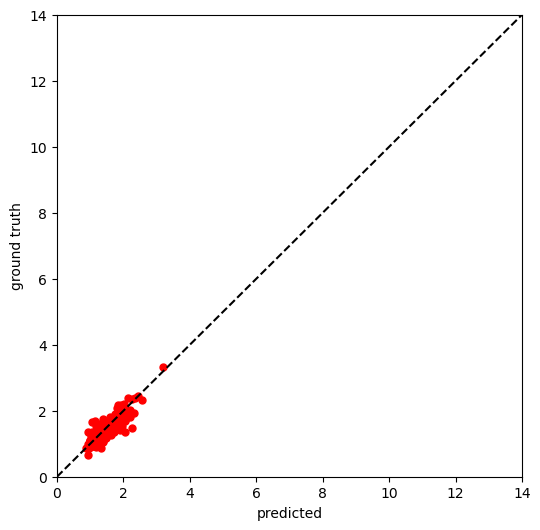

In [8]:
from Utils import true_pred_plot, model_pred

pred_test, true_test = model_pred(model_trained, test_loader, y_scaler_test)
true_pred_plot(pred_test, true_test)

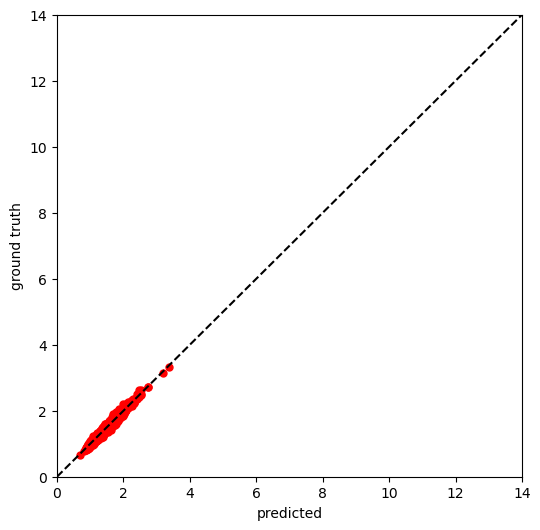

In [9]:
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
pred_train, true_train = model_pred(model_trained, train_loader, y_scaler_train)
true_pred_plot(pred_train, true_train)